Let's train harder and see problems

In [81]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
from torch import optim
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='Greys_r')
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [94]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               ])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28]) torch.Size([64])
tensor(5)


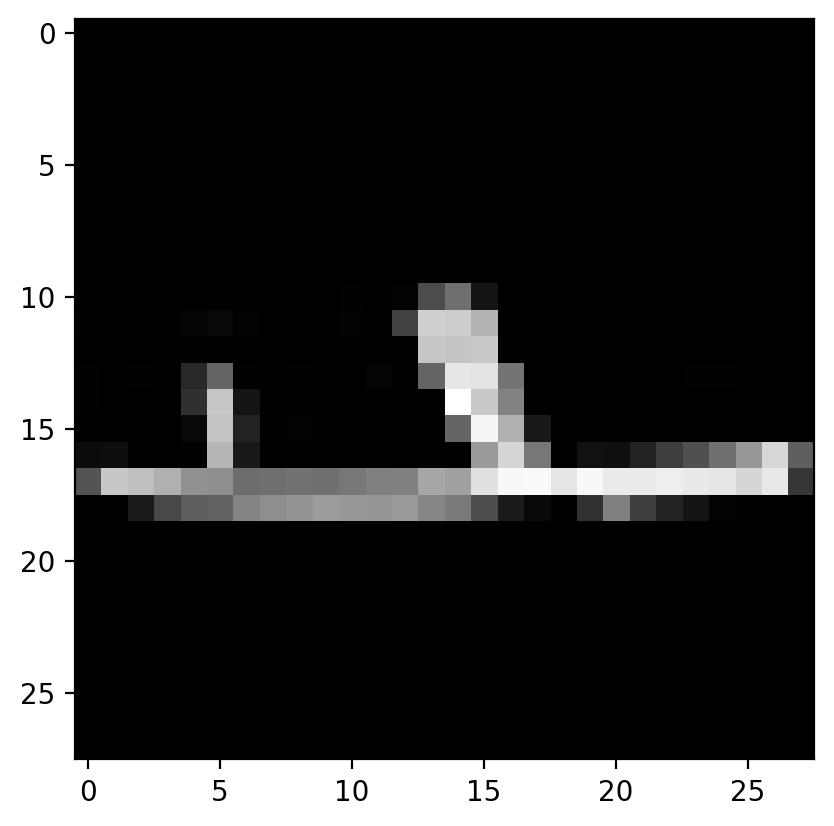

In [74]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)
print(labels[0])
plt.imshow(images[0].squeeze(), cmap='Greys_r');

In [75]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        
        return x

model = Network()

In [59]:
epochs = 30
model = Network()
optimizer = optim.SGD(model.parameters(), lr=0.003)
criterion = nn.NLLLoss()

train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        tot_test_loss = 0
        test_correct = 0  # Number of correct predictions on the test set
        
        with torch.no_grad():
            for images, labels in testloader:
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
                
                output = model(images)
                loss = criterion(output, labels)
                
                tot_test_loss += loss.item()

                ps = torch.exp(output)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                test_correct += equals.sum().item()
                
        # Get mean loss to enable comparison between train and test sets
        train_loss = running_loss / len(trainloader)
        test_loss = tot_test_loss / len(testloader)

        # At completion of epoch
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss),
              "Test Loss: {:.3f}.. ".format(test_loss),
              "Test Accuracy: {:.3f}".format(test_correct / len(testloader.dataset)))

Training loss: 2.1430310741670606
Epoch: 1/30..  Training Loss: 2.143..  Test Loss: 1.822..  Test Accuracy: 0.503
Training loss: 1.3979214338986858
Epoch: 2/30..  Training Loss: 1.398..  Test Loss: 1.120..  Test Accuracy: 0.631
Training loss: 0.9809526956793088
Epoch: 3/30..  Training Loss: 0.981..  Test Loss: 0.900..  Test Accuracy: 0.664
Training loss: 0.8273281132234439
Epoch: 4/30..  Training Loss: 0.827..  Test Loss: 0.796..  Test Accuracy: 0.707
Training loss: 0.7469777668526432
Epoch: 5/30..  Training Loss: 0.747..  Test Loss: 0.736..  Test Accuracy: 0.731
Training loss: 0.6941169757705762
Epoch: 6/30..  Training Loss: 0.694..  Test Loss: 0.695..  Test Accuracy: 0.751
Training loss: 0.6540174948444752
Epoch: 7/30..  Training Loss: 0.654..  Test Loss: 0.659..  Test Accuracy: 0.764
Training loss: 0.6220943278658873
Epoch: 8/30..  Training Loss: 0.622..  Test Loss: 0.630..  Test Accuracy: 0.777
Training loss: 0.5964938000893034
Epoch: 9/30..  Training Loss: 0.596..  Test Loss: 0.61

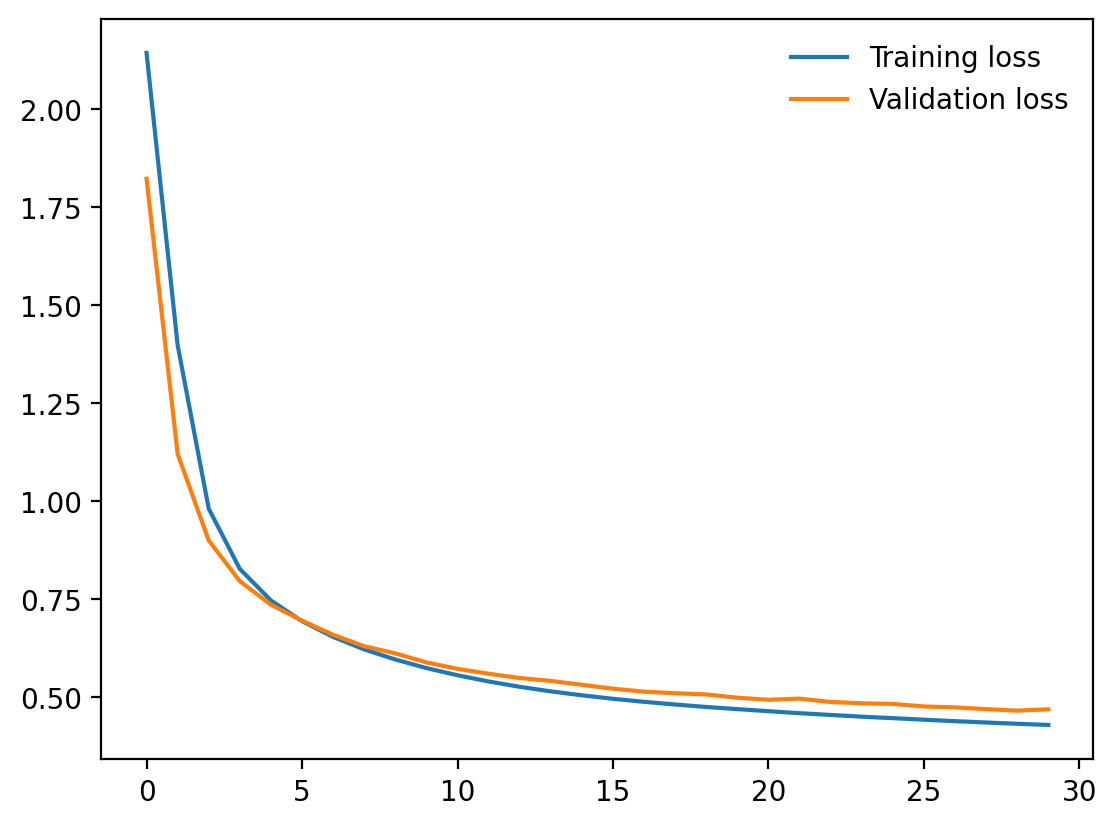

In [61]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [95]:
# But what if we do a more parameter netwrok?
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [96]:
model = Classifier()
criterion = nn.NLLLoss(reduction='sum')
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 30

train_losses, test_losses = [], []
for e in range(epochs):
    tot_train_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        tot_train_loss += loss.item()
        
        loss.backward()
        optimizer.step()
    else:
        tot_test_loss = 0
        test_correct = 0  # Number of correct predictions on the test set
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                loss = criterion(log_ps, labels)
                tot_test_loss += loss.item()

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                test_correct += equals.sum().item()

        # Get mean loss to enable comparison between train and test sets
        train_loss = tot_train_loss / len(trainloader.dataset)
        test_loss = tot_test_loss / len(testloader.dataset)

        # At completion of epoch
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss),
              "Test Loss: {:.3f}.. ".format(test_loss),
              "Test Accuracy: {:.3f}".format(test_correct / len(testloader.dataset)))

Epoch: 1/30..  Training Loss: 0.696..  Test Loss: 0.469..  Test Accuracy: 0.828
Epoch: 2/30..  Training Loss: 0.430..  Test Loss: 0.422..  Test Accuracy: 0.846
Epoch: 3/30..  Training Loss: 0.379..  Test Loss: 0.390..  Test Accuracy: 0.862
Epoch: 4/30..  Training Loss: 0.344..  Test Loss: 0.377..  Test Accuracy: 0.864
Epoch: 5/30..  Training Loss: 0.326..  Test Loss: 0.364..  Test Accuracy: 0.867
Epoch: 6/30..  Training Loss: 0.308..  Test Loss: 0.348..  Test Accuracy: 0.869
Epoch: 7/30..  Training Loss: 0.293..  Test Loss: 0.348..  Test Accuracy: 0.872
Epoch: 8/30..  Training Loss: 0.279..  Test Loss: 0.355..  Test Accuracy: 0.874
Epoch: 9/30..  Training Loss: 0.270..  Test Loss: 0.341..  Test Accuracy: 0.876
Epoch: 10/30..  Training Loss: 0.259..  Test Loss: 0.333..  Test Accuracy: 0.876
Epoch: 11/30..  Training Loss: 0.253..  Test Loss: 0.338..  Test Accuracy: 0.877
Epoch: 12/30..  Training Loss: 0.243..  Test Loss: 0.316..  Test Accuracy: 0.889
Epoch: 13/30..  Training Loss: 0.235.

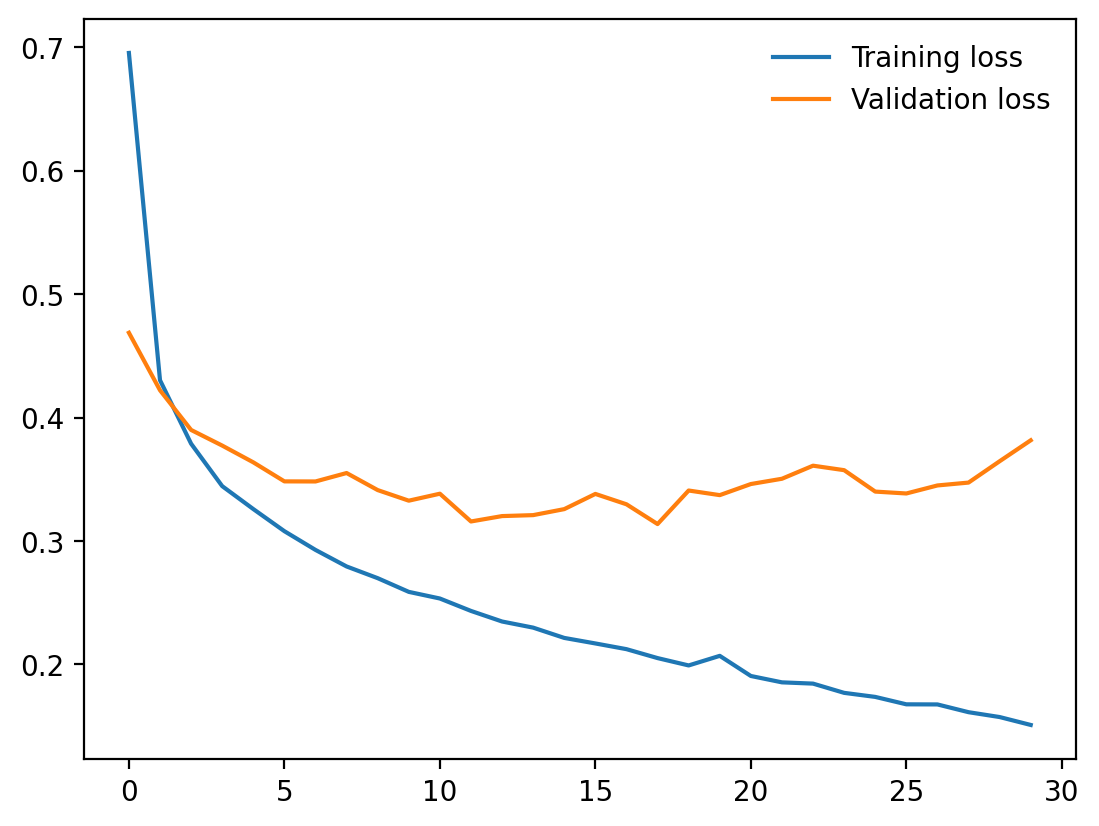

In [97]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

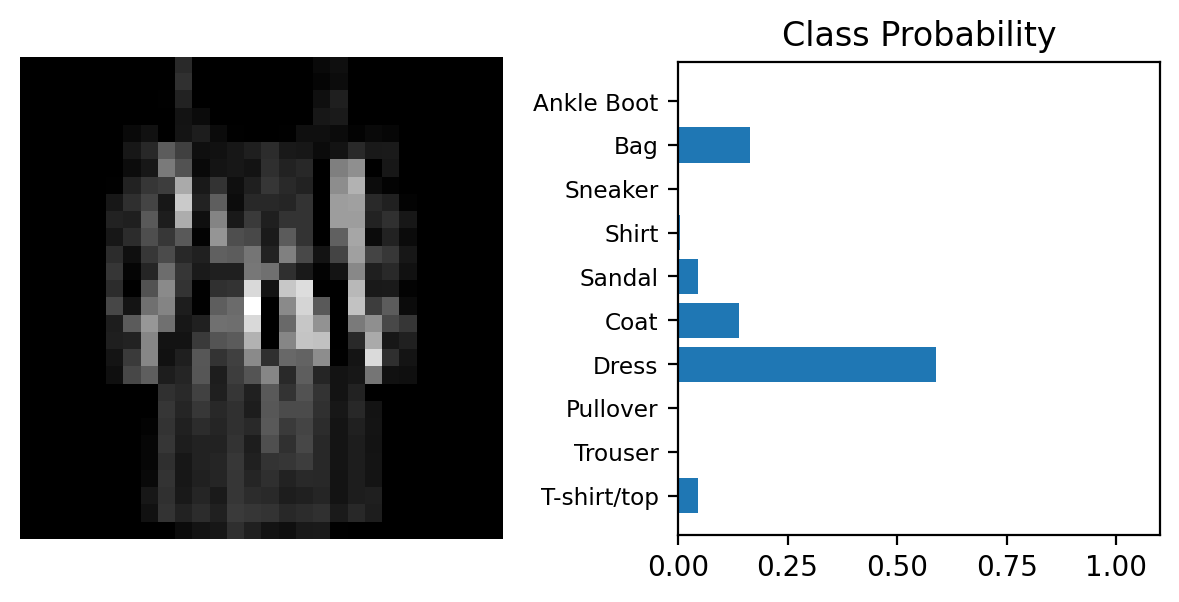

In [93]:
# Grab some data 
dataiter = iter(testloader)
images, labels = next(dataiter)

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = torch.exp(model(images[img_idx,:]))

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

In [83]:
ps

tensor([[-38.2936, -63.9995, -55.2757, -47.3732, -51.8515, -45.7140, -44.4716,
         -49.8367,   0.0000, -43.1737]], grad_fn=<LogSoftmaxBackward0>)